In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import os
from tqdm import tqdm
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from IPython.display import Image, display
import IPython
from collections import Counter

In [8]:
model_path = "./Models/SSP_resnet.h5"

In [9]:
model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)

In [10]:
model.compile()

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50v2 (Functional)        (None, 8, 8, 2048)   23564800    ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 16)     32784       ['resnet50v2[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 16)     131088      ['resnet50v2[0][0]']         

Crop_img\Babi\babi_100_0.jpg
Crop_img\Calimerio\calimero_100_0.jpg
Crop_img\Chrysanthemum\chrysanthemum_101_0.jpg
Crop_img\Hydrangeas\hydrangeas_101_0.jpg
Crop_img\Lisianthus\lisianthus_100_0.jpg
Crop_img\PingPong\pingpong_100_0.jpg
Crop_img\Rosy\rosy_100_0.jpg
Crop_img\Tana\tana_100_0.jpg


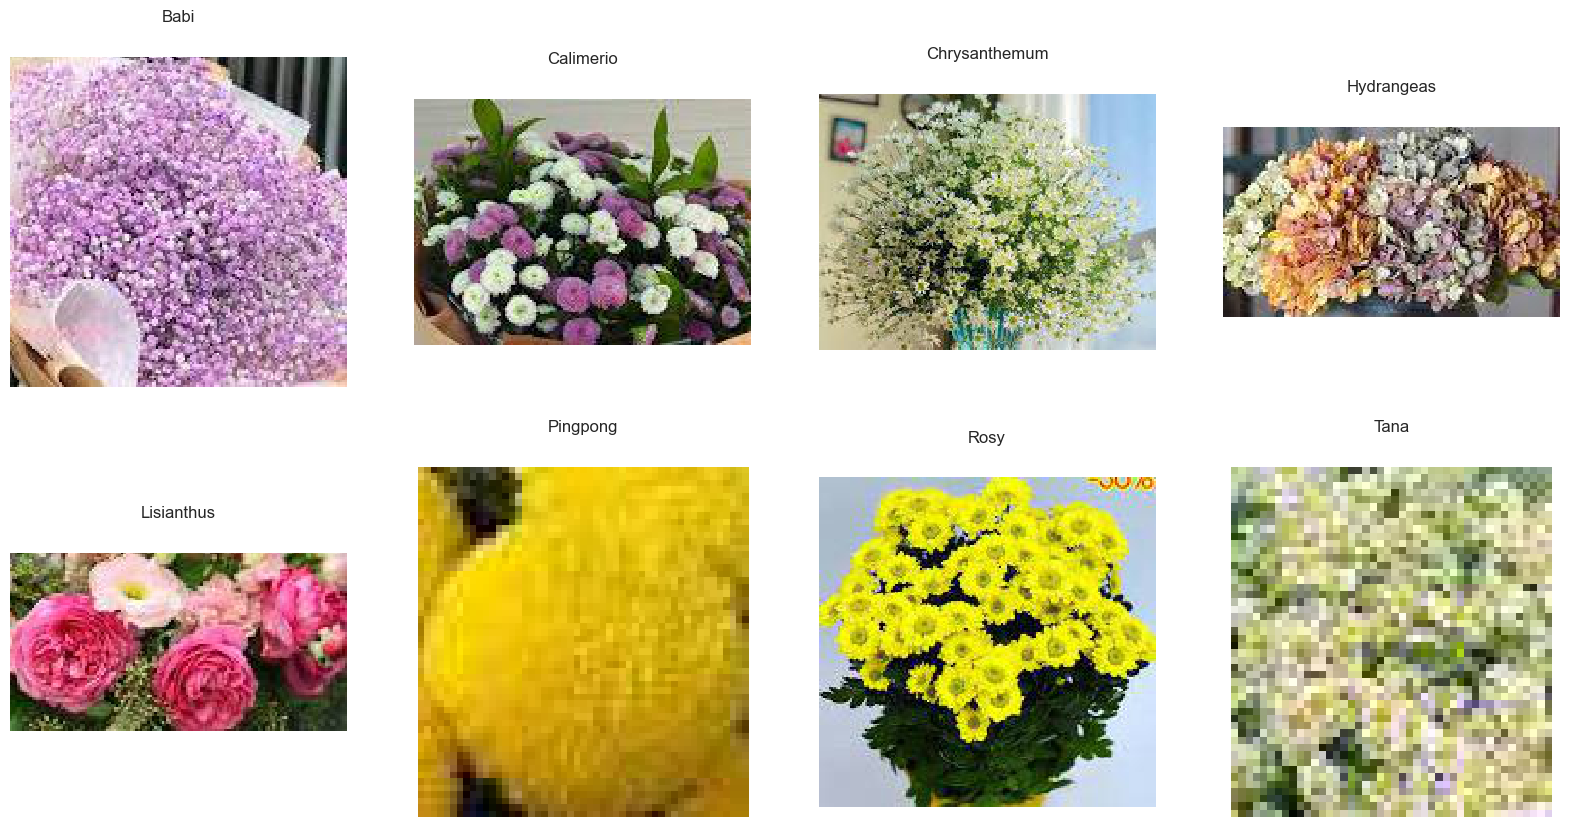

In [33]:
import random

flowers_dir = './Crop_img//'
flower_labels = sorted(os.listdir(flowers_dir))
flower_labels

X = []
y = []
chosen_flower = flower_labels.copy()


img_size = 256

fig,ax = plt.subplots(2, 4, figsize=(20,10))
ax=ax.flatten()

flowers_dir_path_object = pathlib.Path(flowers_dir)

for label_number,flower in enumerate(chosen_flower):
    flower_images_paths = list(flowers_dir_path_object.glob(f'{flower}/*.jpg'))
    ax[label_number].set_title(flower.capitalize())
    ax[label_number].axis('off')
    print(flower_images_paths[0].__str__())
    flower_img = np.array(load_img(flower_images_paths[0].__str__()))
    ax[label_number].matshow(flower_img)
    for image in flower_images_paths:
        resized_image = load_img(str(image),target_size=(img_size, img_size))
        y.append(label_number)
        X.append(np.array(resized_image))
        
X = np.array(X)
y = np.array(y)

In [34]:
def sort_with_index(lst):
    indexed_lst = list(enumerate(lst))  # Pair each element with its index
    sorted_lst = sorted(indexed_lst, key=lambda x: x[1], reverse=True)  # Sort based on the values
    sorted_indices = [index for index, _ in sorted_lst]  # Extract the sorted indices
    return sorted_indices

In [35]:
def predict_proba(model, image):
    
    result = model.predict(np.array([np.array(image)]), verbose=0)
    highest = np.argmax(result)
    for k, v in enumerate(result[0]):
        is_highest = "[ ]"
        if k == highest:
            is_highest = "[*]"
        # print(f'{is_highest} {flower_labels[k]}:\t{round(v*100, 2)}%')
    
    return highest, round(result[0][highest] * 100, 2)

In [36]:
def predict_final(model, image_path ):
    image_r = load_img(image_path,target_size=(img_size, img_size))
    result = model.predict(np.array([np.array(image_r)]), verbose=0)
    index = np.argmax(result)
    display(image_r)
    sorted_index = sort_with_index(result[0])
    for j in sorted_index[:3]:
        proba = round(result[0][j] * 100, 2)
        if proba > 90:
            print(flower_labels[j], proba)
            break
        elif proba < 10:
            break
        print(flower_labels[j], proba)


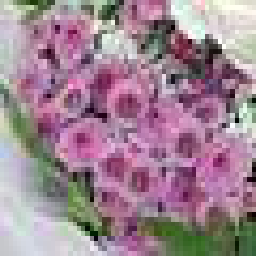

Tana 28.36
Rosy 24.57
Chrysanthemum 21.52


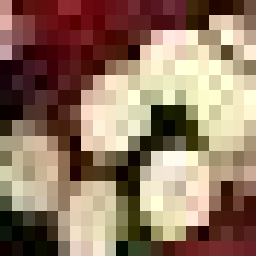

Calimerio 46.12
Lisianthus 27.63
PingPong 17.0


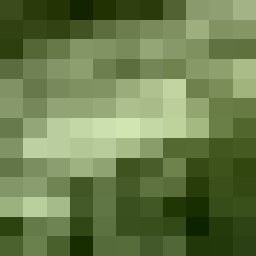

Lisianthus 29.57
Chrysanthemum 16.59
Tana 15.49


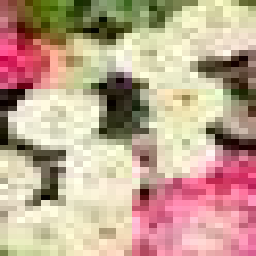

Rosy 30.77
Lisianthus 26.18
PingPong 18.11


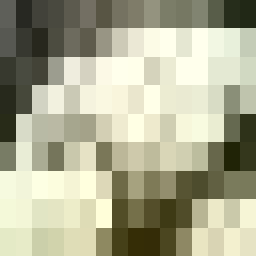

Hydrangeas 20.81
Babi 20.23
Tana 17.36


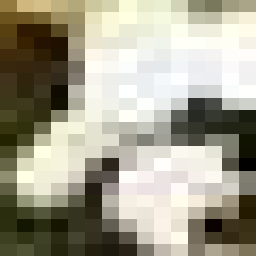

Hydrangeas 30.43
Calimerio 25.48
PingPong 19.42


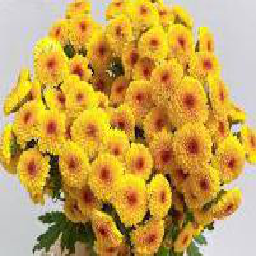

Calimerio 58.64
Rosy 26.62


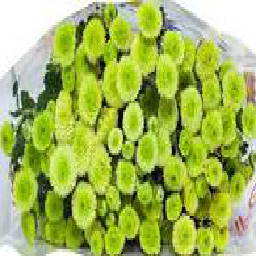

Lisianthus 33.42
Calimerio 25.03
Rosy 23.35


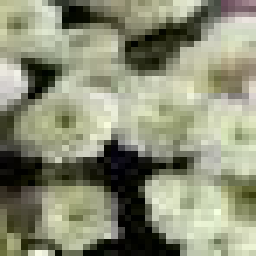

Chrysanthemum 24.14
Hydrangeas 18.55
Rosy 16.47


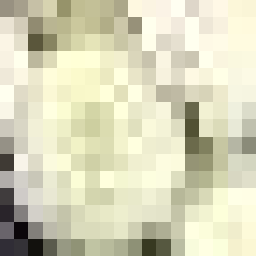

Babi 24.41
Chrysanthemum 22.84
Rosy 14.01


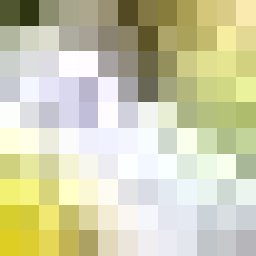

Chrysanthemum 22.65
Hydrangeas 19.18
Rosy 18.03


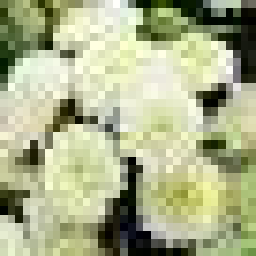

Rosy 29.95
PingPong 22.17
Calimerio 15.24


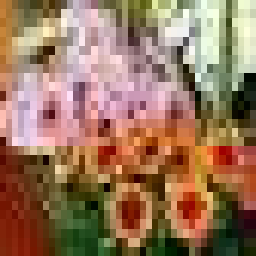

Hydrangeas 36.84
Chrysanthemum 34.24
Rosy 10.11


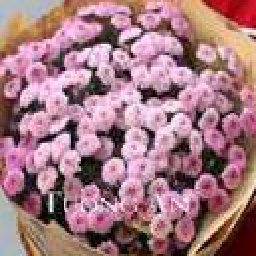

Calimerio 61.06
Rosy 12.32


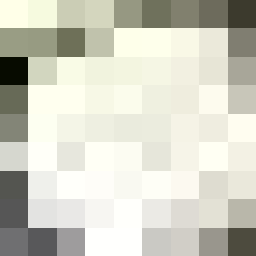

Rosy 22.19
Calimerio 13.63
PingPong 12.64


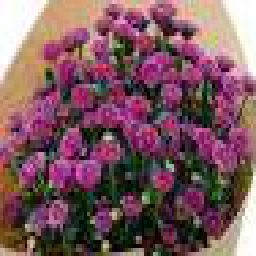

Rosy 39.32
Calimerio 34.75


FileNotFoundError: [Errno 2] No such file or directory: './Crop_img/Calimerio/calimero_136_0.jpg'

In [40]:
for i in range(120, 140):
    predict_final(model, f'./Crop_img/Calimerio/calimero_{i}_0.jpg')

# Data preps

In [ ]:
flowers_dir = './Crop_img/'
flower_labels = sorted(os.listdir(flowers_dir))
flower_labels

['Babi',
 'Calimerio',
 'Chrysanthemum',
 'Hydrangeas',
 'Lisianthus',
 'PingPong',
 'Rosy',
 'Tana']

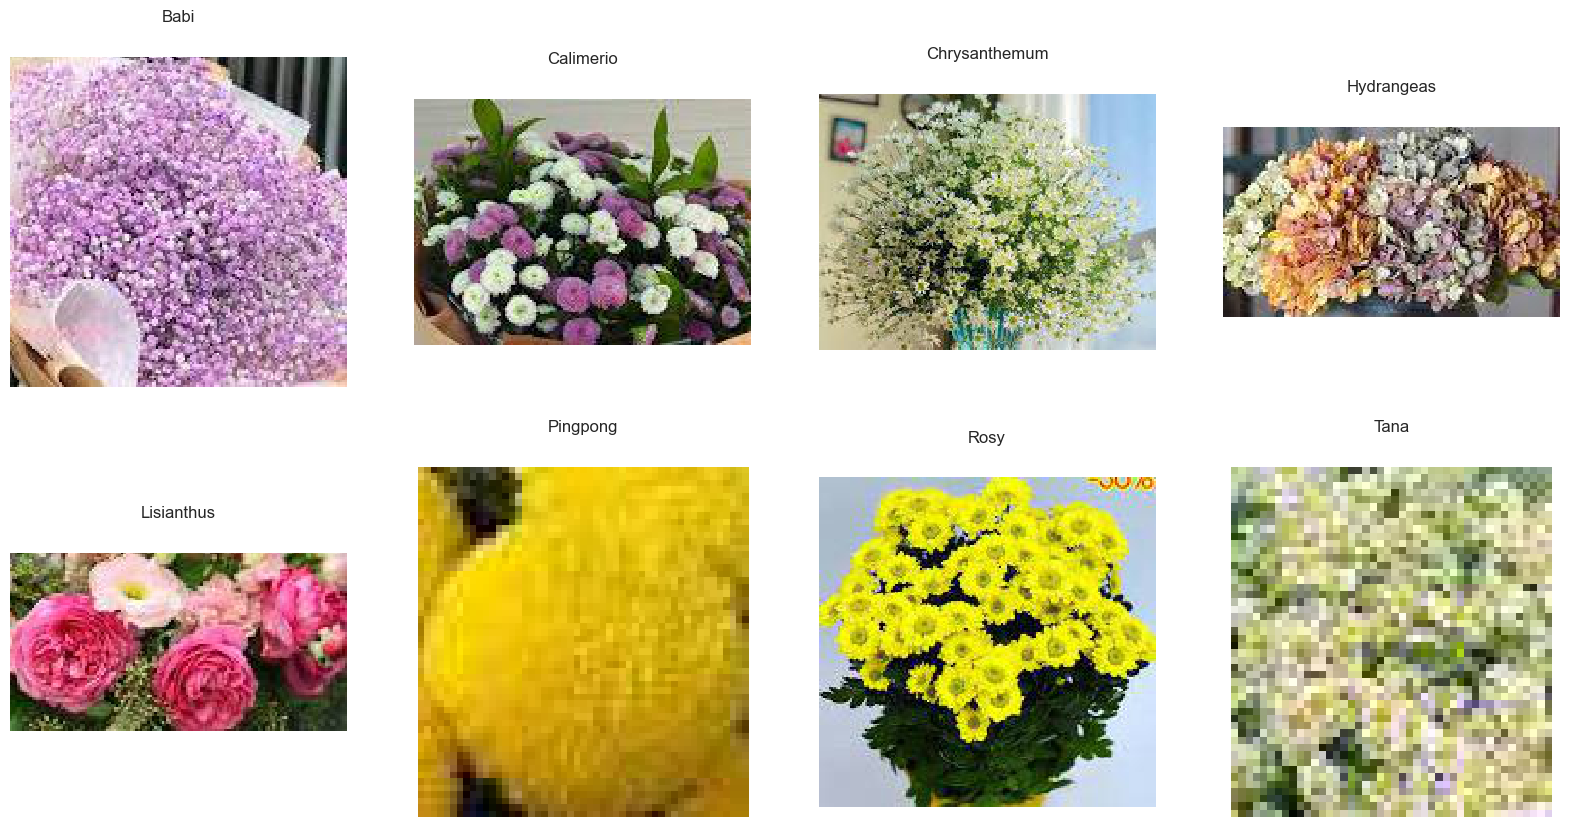

In [ ]:
X = []
y = []

img_height = 256
img_width = 256

fig,ax = plt.subplots(2, 4, figsize=(20,10))
ax=ax.flatten()

flowers_dir_path_object = pathlib.Path(flowers_dir)

for label_number,flower in enumerate(flower_labels):
    # get all paths of images inside flower subdirectory
    flower_images_paths = list(flowers_dir_path_object.glob(f'{flower}/*.jpg'))
    ax[label_number].set_title(flower.capitalize())
    ax[label_number].axis('off')
    flower_img = np.array(load_img(flower_images_paths[0].__str__()))
    ax[label_number].matshow(flower_img)
    # print(flower_images_paths[0].__str__())
    for image in flower_images_paths:
        # load and resize image
        resized_image = load_img(str(image),target_size=(img_height, img_width))
        # append features in X and labels in y
        X.append(np.array(resized_image))
        y.append(label_number)
        


In [ ]:
import os

def scanData():
    data_count = pd.DataFrame(data={"flower": [], "count": []})
    meta_data_df = pd.DataFrame(data={"image_path": [], "flower_type": []})
    folder_path = flowers_dir

    subdirectories = next(os.walk(folder_path))[1]

    print(subdirectories)

    for i in subdirectories:
        sub = next(os.walk(folder_path+"/"+i))
        
        new_meta_data = pd.DataFrame(data={"image_path": [ (sub[0] + "/" + j) for j in sub[2]] , "flower_type": i})
        meta_data_df = pd.concat([meta_data_df, new_meta_data], ignore_index=True)
        
        new_data = pd.DataFrame(data={"flower": i, "count": len(sub[2])}, index=[0])      
        data_count = pd.concat([data_count, new_data], ignore_index=True)
        print(i, len(sub[2]), len([ sub[0] + j for j in sub[2]]))

    return data_count, meta_data_df

img_count, meta_data = scanData()
img_count

['Babi', 'Calimerio', 'Chrysanthemum', 'Hydrangeas', 'Lisianthus', 'PingPong', 'Rosy', 'Tana']
Babi 889 889
Calimerio 1209 1209
Chrysanthemum 916 916
Hydrangeas 1098 1098
Lisianthus 3600 3600
PingPong 1957 1957
Rosy 302 302
Tana 601 601


,flower,count
0,Babi,889.0
1,Calimerio,1209.0
2,Chrysanthemum,916.0
3,Hydrangeas,1098.0
4,Lisianthus,3600.0
5,PingPong,1957.0
6,Rosy,302.0
7,Tana,601.0


<Axes: xlabel='flower', ylabel='count'>

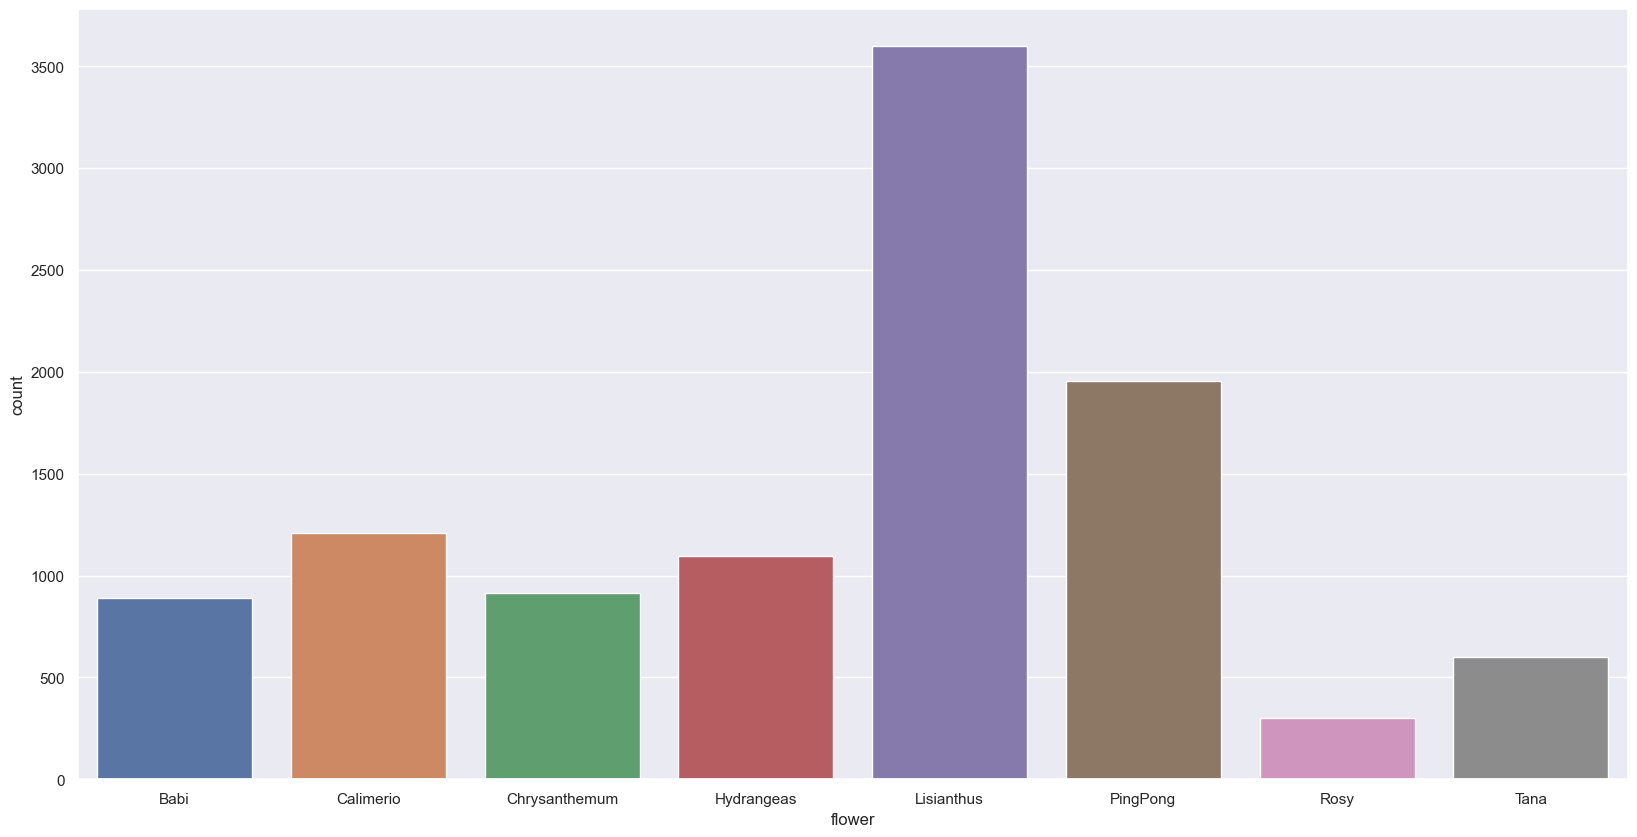

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=img_count, x='flower', y='count')

In [ ]:
X = np.array(X)
y = np.array(y)

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (10572, 256, 256, 3)
y shape: (10572,)


## Model Building

* Train test split
* Fine-tuning pre-trained model
* Model evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))

X train shape: (7929, 256, 256, 3)
X test shape: (2643, 256, 256, 3)


# RCNN MODEL

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model, Sequential

In [ ]:
def get_model():
    inputs = tf.keras.Input(shape=(256, 256, 3))
    resnet_backbone = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    # weights='imagenet',
    input_shape=(256,256,3),
    classes=9,
    classifier_activation='softmax'
    )
    # resnet_backbone.po
    model_output = resnet_backbone(inputs)
    out_1 = Conv2D(16, (1, 1), activation='relu', kernel_initializer='lecun_uniform', dilation_rate=1, padding='same')(model_output)
    out_6 = Conv2D(16, (2, 2), activation='relu', kernel_initializer='lecun_uniform',dilation_rate=6, padding='same')(model_output)
    out_12 = Conv2D(16, (4, 4), activation='relu', kernel_initializer='lecun_uniform',dilation_rate=10, padding='same')(model_output)
    out_14 = Conv2D(16, (8, 8), activation='relu', kernel_initializer='lecun_uniform',dilation_rate=14, padding='same')(model_output)
    
    x = layers.Concatenate(axis=-1)([out_1, out_6, out_12, out_14])
    x = layers.Flatten()(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(8, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
my_model = get_model()

In [ ]:
# my_model.summary()
sgd_opt = tf.keras.optimizers.SGD(
    learning_rate=0.00001,
    momentum=0.9,
)
my_model.compile( optimizer=sgd_opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_accuracy'])

In [ ]:
history = my_model.fit(X_train,y_train,batch_size=64,validation_split=0.2,epochs=10)

Epoch 1/10


In [ ]:
y_hat_label = np.array([i.argmax() for i in y_hat])
y_hat_label.shape

In [148]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y, y_hat_label)

FN = tf.keras.metrics.FalseNegatives(
    thresholds=None, name=None, dtype=None
)
FN.update_state(y, y_hat_label)

FP = tf.keras.metrics.FalsePositives(
    thresholds=None, name=None, dtype=None
)
FP.update_state(y, y_hat_label)

CA = tf.keras.metrics.Accuracy(
    name='categorical_accuracy', dtype=None
)
CA.update_state(y, y_hat_label)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4621.0>

In [149]:
print(m.result().numpy())
print("FN:", FN.result().numpy())
print("FP:", FP.result().numpy())
print("accuracy:", CA.result().numpy())

0.8084534
FN: 395.0
FP: 257.0
accuracy: 0.5063839


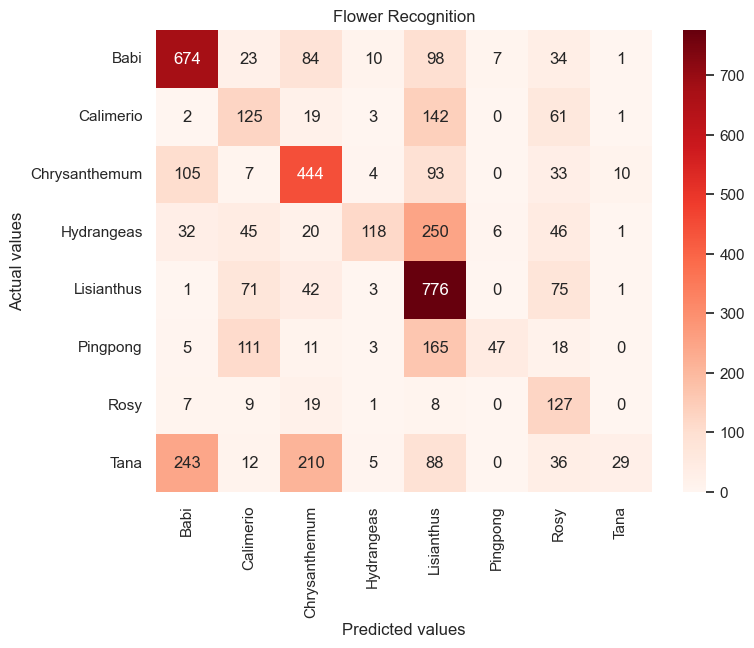

In [150]:
confusion_matrix_result = confusion_matrix(y, y_hat_label)

labels = flower_labels
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Flower Recognition')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [151]:
def test_prediction(image_path: str):
    im = Image.open(image_path)
    display(im)
    flower_img_test = np.array(load_img(image_path, target_size=(img_size, img_size)))
    # flower_img_test.shape
    prediction = model.predict(np.array([flower_img_test]))
    max_index = prediction.argmax()
    print(image_path)
    for k, v in enumerate(flower_labels):
        print(flower_labels[k], f'{round(prediction[0][k] * 100, 2)}%')

In [58]:
# test_arr = ["Flowers/Babi/babi_100.jpg",
# "Flowers/Calimerio/calimero_100.jpg",
# "Flowers/Chrysanthemum/chrysanthemum_100.jpg",
# "Flowers/Hydrangeas/hydrangeas_150.jpg",
# "Flowers/Lisianthus/lisianthus_100.jpg",
# "Flowers/Pingpong/pingpong_100.jpg",
# "Flowers/Rosy/rosy_100.jpg",
# "Flowers/Tana/tana_100.jpg"]
# for i in test_arr:
#     test_prediction(i)

In [87]:

class RoiPoolingConv(tf.keras.layers.Layer):
    '''ROI pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_size: int
            Size of pooling region to use. pool_size = 7 will result in a 7x7 region.
        num_rois: number of regions of interest to be used
    # Input shape
        list of two 4D tensors [X_img,X_roi] with shape:
        X_img:
        `(1, channels, rows, cols)` if dim_ordering='th'
        or 4D tensor with shape:
        `(1, rows, cols, channels)` if dim_ordering='tf'.
        X_roi:
        `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
    # Output shape
        3D tensor with shape:
        `(1, num_rois, channels, pool_size, pool_size)`
    '''
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.common.image_dim_ordering()
        assert self.dim_ordering in {'tf', 'th'}, 'dim_ordering must be in {tf, th}'

        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        if self.dim_ordering == 'th':
            self.nb_channels = input_shape[0][1]
        elif self.dim_ordering == 'tf':
            self.nb_channels = input_shape[0][3]

    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        img = x[0]
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]
            
            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            #NOTE: the RoiPooling implementation differs between theano and tensorflow due to the lack of a resize op
            # in theano. The theano implementation is much less efficient and leads to long compile times

            if self.dim_ordering == 'th':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')

                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)
                        
                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

            elif self.dim_ordering == 'tf':
                x = K.cast(x, 'int32')
                y = K.cast(y, 'int32')
                w = K.cast(w, 'int32')
                h = K.cast(h, 'int32')

                rs = tf.image.resize(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
                outputs.append(rs)

        final_output = K.concatenate(outputs, axis=0)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        if self.dim_ordering == 'th':
            final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
        else:
            final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
    
    
    def get_config(self):
        config = {'pool_size': self.pool_size,
                  'num_rois': self.num_rois}
        base_config = super(RoiPoolingConv, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def vgg19_roipooling(image, proposals):
    vgg = tf.keras.applications.VGG19(include_top=False)
    features = vgg(image)
    roi_pooling = ROIPooling(16, 16)
    # pooled_features = ROIPooling(pool_size=(7, 7), spatial_scale=1.0)(features, proposals)
    
    
    pooled_rois = RoiPoolingConv(10, [4, 4, 4, 4])(vgg.get_layer("block5_conv3"))
    return pooled_rois


vgg19_roipooling(X[0:1], [0 ,0 ,0, 0])

NameError: name 'K' is not defined